In [55]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_city_ride_df = pd.merge(ride_data_df, city_data_df, how='outer', on='city')
# Display the data table for preview
combined_city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [45]:
# splitting complete ride dataframe by type and city
split_ride_data_by_type_city = combined_city_ride_df.groupby('type')
#split_ride_data_by_type_city.head()
#creating individual dataframes for each type
urban_rides = split_ride_data_by_type_city.get_group('Urban')
urban_rides.head()
suburban_rides = split_ride_data_by_type_city.get_group('Suburban')
suburban_rides.head()
rural_rides = split_ride_data_by_type_city.get_group('Rural')
rural_rides.head()
#aggregating urban data
urban_ride_count = urban_rides.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_rides.groupby(["city"]).mean()["fare"]
urban_driver_count = urban_rides.groupby(["city"]).mean()["driver_count"]
#aggregating suburban data
suburban_ride_count = suburban_rides.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_rides.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban_rides.groupby(["city"]).mean()["driver_count"]
#aggregating rural data
rural_ride_count = rural_rides.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_rides.groupby(["city"]).mean()["fare"]
rural_driver_count = rural_rides.groupby(["city"]).mean()["driver_count"]




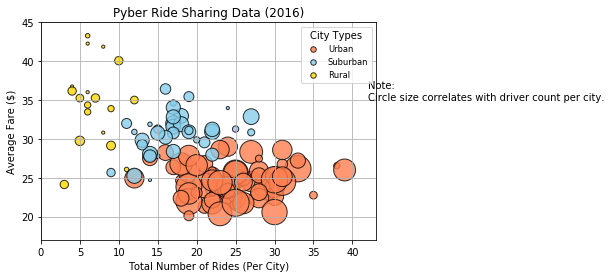

In [91]:
urban_scatter_plot = plt.scatter(urban_ride_count,
           urban_avg_fare,
           s=10*urban_driver_count, c="coral",
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Urban")
suburban_scatter_plot =plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s=10*suburban_driver_count, c="skyblue",
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Suburban")
rural_scatter_plot = plt.scatter(rural_ride_count,
           rural_avg_fare,
           s=10*rural_driver_count, c="gold",
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Rural")
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.xlim((0,43))
plt.ylim((17,45))
plt.grid(True)

# Create a legend
legnd = plt.legend(fontsize="small", mode="Expanded",
                 numpoints=1, scatterpoints=1,
                 loc="best", title="City Types",
                 labelspacing=0.5)
legnd.legendHandles[0]._sizes = [30]
legnd.legendHandles[1]._sizes = [30]
legnd.legendHandles[2]._sizes = [30]
# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")
# Save Figure
plt.savefig("data/Figure1.png")
# Show plot
plt.show()


## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types


# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


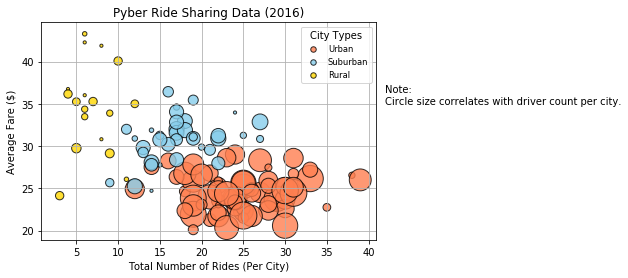

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

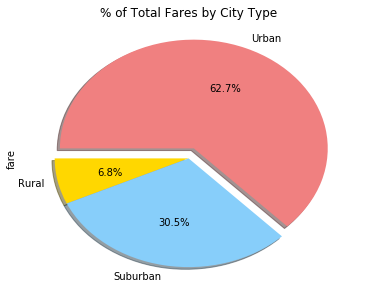

In [77]:
# Calculate Type Percents
#split_ride_data_by_type_city = combined_city_ride_df.groupby('type')
tot_fare = combined_city_ride_df.sum()['fare']
perc_total_fares_by_city_count = (split_ride_data_by_type_city.sum()['fare']/tot_fare)*100
#tot_fare
perc_total_fares_by_city_count
# Build Pie Chart
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)
pie_chart_1 = perc_total_fares_by_city_count.plot.pie(subplots=True,explode = explode, colors = colors, figsize=(6, 5),autopct='%1.1f%%', shadow=True, startangle=180)
plt.title('% of Total Fares by City Type')
plt.savefig("data/Pie_Fig1.png")
plt.show()

# Save Figure



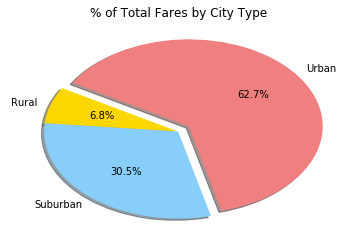

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

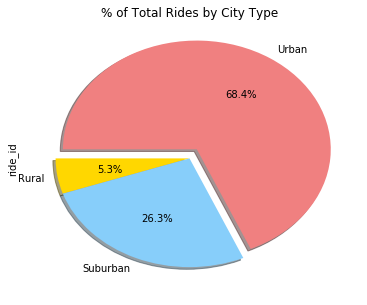

In [79]:
# Calculate Ride Percents
#split_ride_data_by_type_city = combined_city_ride_df.groupby('type')
tot_ride = combined_city_ride_df.count()['ride_id']
perc_total_ride_by_city_type = (split_ride_data_by_type_city.count()['ride_id']/tot_ride)*100
#tot_ride
perc_total_ride_by_city_type
# Build Pie Chart
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)
pie_chart_2 = perc_total_ride_by_city_type.plot.pie(subplots=True,explode = explode, colors = colors, figsize=(6, 5),autopct='%1.1f%%', shadow=True, startangle=180)
plt.title('% of Total Rides by City Type')
plt.savefig("data/Pie_Fig2.png")
plt.show()


# Build Pie Chart

# Save Figure


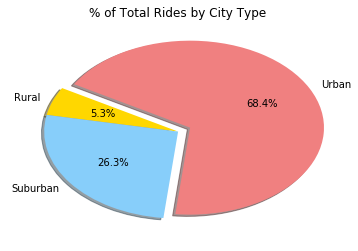

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

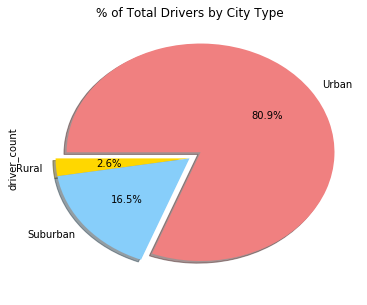

In [88]:
# Calculate Driver Percents

tot_drivers = city_data_df.sum()['driver_count']
#tot_drivers
perc_tot_drivers_by_type = (city_data_df.groupby('type').sum()['driver_count']/tot_drivers)*100
#perc_tot_drivers_by_type

# Build Pie Chart
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)
pie_chart_3 = perc_tot_drivers_by_type.plot.pie(subplots=True,explode = explode, colors = colors, figsize=(6, 5),autopct='%1.1f%%', shadow=True, startangle=180)
plt.title('% of Total Drivers by City Type')
plt.savefig("data/Pie_Fig3.png")
plt.show()

# Build Pie Charts

# Save Figure


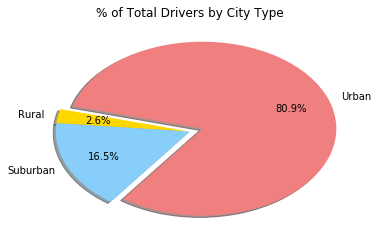

In [6]:
# Show Figure
plt.show()